In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

In [2]:
abalones_df = pd.read_csv('COMP472-A1-datasets/abalone.csv')
# print(penguins_df.head())

In [3]:
# print csv file info
print(abalones_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [4]:
# # label encoding string values to int
le = preprocessing.LabelEncoder()
abalones_df['Type'] = le.fit_transform(abalones_df['Type'])

print(abalones_df.info()) 
print(abalones_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   int64  
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB
None
   Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0     0         0.605     0.470   0.165       1.1775         0.6110   
1     2         0.550     0.425   0.150       0.8315         0.4110   
2     2         0.460     0.345   0.110       0.4595         0.2350   
3     0         0.650     0.475   0.165       1.3875         0.5800  

In [5]:
# converting the features into 1-hot vectors
# abalones_df = pd.get_dummies(abalones_df, columns=['Type'], prefix='Type', dtype='int64')
# print(abalones_df.info()) 
# print(abalones_df.head())

# Note we've left this commented out to not affect columns of the table being used for the rest of the results

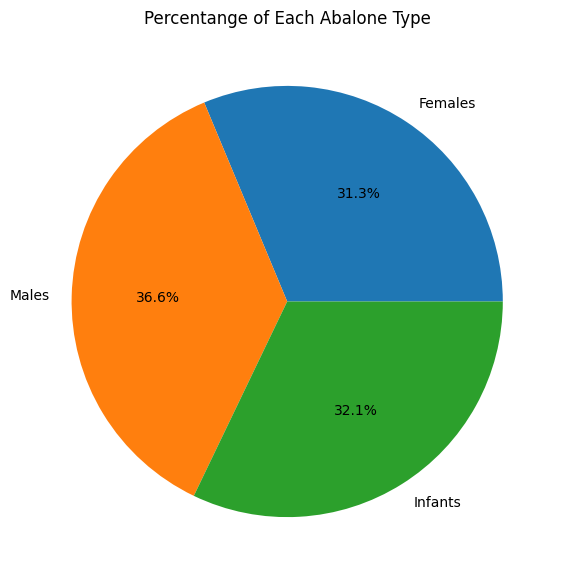

In [6]:
# plot pie chart based on output class species
total = abalones_df['Type'].count()

num_females = abalones_df[abalones_df['Type'] == 0]['Type'].count()
percent_females= num_females / total * 100

num_infants = abalones_df[abalones_df['Type'] == 1]['Type'].count()
percent_infants = num_infants / total * 100

num_males = abalones_df[abalones_df['Type'] == 2]['Type'].count()
percent_males = num_males / total * 100

species_percentages = [percent_females, percent_males, percent_infants]

plt.figure(figsize=(7, 7))
plt.pie(species_percentages, labels=['Females', 'Males', 'Infants'], autopct='%1.1f%%')
plt.title("Percentange of Each Abalone Type")
plt.savefig('ablone_types_pie_chart.png')

plt.show()

# Note: dataset fairly balanced in terms of abalone types

# balanced dataset : accuracy 

In [7]:
# split data into training and testing sets
# default split is 25% testing, 75% training
# data is shuffled by default, but no seeding applied 

X, y = [abalones_df.drop('Type', axis=1), abalones_df['Type']]

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y)

# Base-DT
=> a decision tree with the default parameters 

'abalone_types_base_dt.pdf'

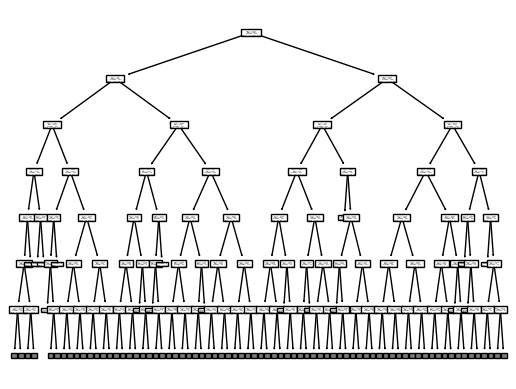

In [8]:
# default parameter for criterion = Gini impurity 
dtc = tree.DecisionTreeClassifier()

dtc.fit(X_train_set, y_train_set)
tree.plot_tree(dtc, max_depth=6)

dot_data = tree.export_graphviz(dtc, out_file=None,
    feature_names= ['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
    class_names=['F','M','I'],
    filled=True, 
    rounded=True,
    max_depth=6,)
graph = graphviz.Source(dot_data) 

graph.render("abalone_types_base_dt")   # save to pdf

In [9]:
y_predict = dtc.predict(X_test_set)

print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
3479         0.075     0.055   0.010       0.0020         0.0010   
3767         0.655     0.490   0.175       1.3585         0.6395   
3858         0.625     0.500   0.195       1.3690         0.5875   
3336         0.600     0.485   0.175       1.2675         0.4995   
779          0.630     0.475   0.145       1.0605         0.5165   
...            ...       ...     ...          ...            ...   
2367         0.540     0.420   0.130       0.7505         0.3680   
111          0.600     0.460   0.170       1.1805         0.4560   
3775         0.550     0.435   0.140       0.7450         0.3470   
3818         0.370     0.275   0.140       0.2215         0.0970   
3485         0.555     0.450   0.175       0.8740         0.3275   

      VisceraWeight  ShellWeight  Rings  
3479         0.0005       0.0015      1  
3767         0.2940       0.3650     10  
3858         0.2185       0.3700     17  
3336         0.

# Top-DT
=> a Decision Tree found using a gridsearch 

# Base-MLP
=> a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters

# Top-MLP
=> a Multi-Layered Perceptron found using grid search